In [ ]:
#kaggle rnsa competition

In [28]:
#Exploratory data analysis

In [2]:
dataset_path='/kaggle/input/rsna-intracranial-aneurysm-detection'

In [3]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv')
train_df.head()

,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
import plotly.express as px

location_cols = [col for col in train_df.columns if col not in ['SeriesInstanceUID', 'PatientAge', 'PatientSex', 'Modality', 'Aneurysm Present']]
location_counts = train_df[location_cols].sum().sort_values(ascending=False)

fig = px.bar(
    location_counts,
    orientation='v',
    title='Aneurysm Count by Location',
    labels={'value': 'Count', 'index': 'Location'},
    color=location_counts.values,
    color_continuous_scale=[[0, '#00BFC4'], [1, '#C77CFF']],
)
fig.show()

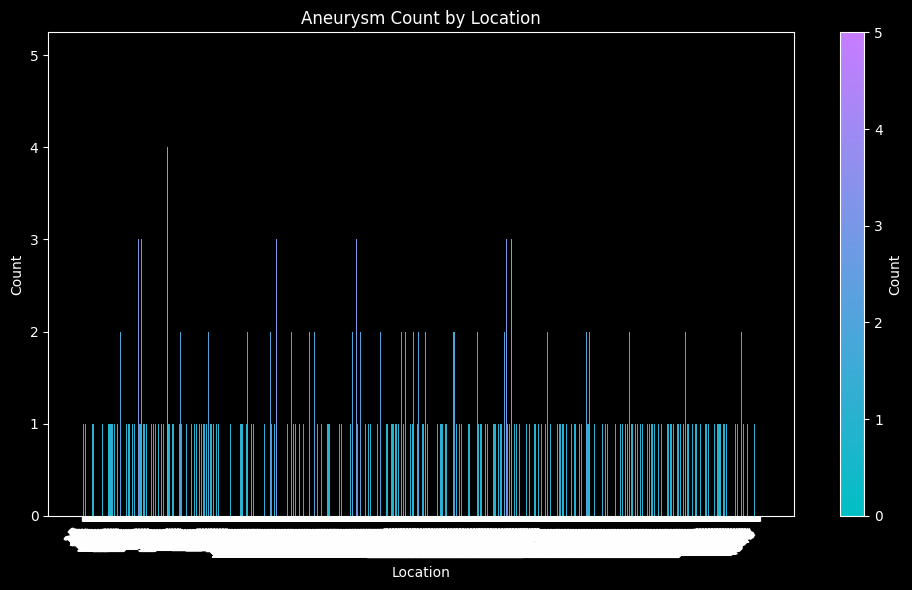

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# location_counts is a Pandas Series indexed by location with integer counts
# location_counts = train_df[location_cols].sum().sort_values(ascending=False)

values = location_counts.values
labels = location_counts.index

# Normalize counts to [0,1] for colormap mapping
norm = mpl.colors.Normalize(vmin=values.min(), vmax=values.max())  # linear normalization [web:7][web:13][web:19]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    "custom_cmap", ["#00BFC4", "#C77CFF"]
)  # two-color continuous scale [web:8]

colors = cmap(norm(values))  # per-bar colors from colormap [web:8]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(labels))

ax.bar(x, values, color=colors)  # individual bar colors [web:8]
ax.set_title("Aneurysm Count by Location")
ax.set_xlabel("Location")
ax.set_ylabel("Count")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")

# Optional colorbar to show mapping from counts to color
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)  # scalar mappable for colorbar [web:7][web:13]
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Count")

plt.tight_layout()
plt.show()


In [5]:
modality_counts = train_df['Modality'].value_counts()

fig = px.pie(
    names=modality_counts.index,
    values=modality_counts.values,
    title='Imaging Modality Distribution',
    hole=0.4,
    color_discrete_sequence=['#00BFC4', '#C77CFF']
)
fig.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

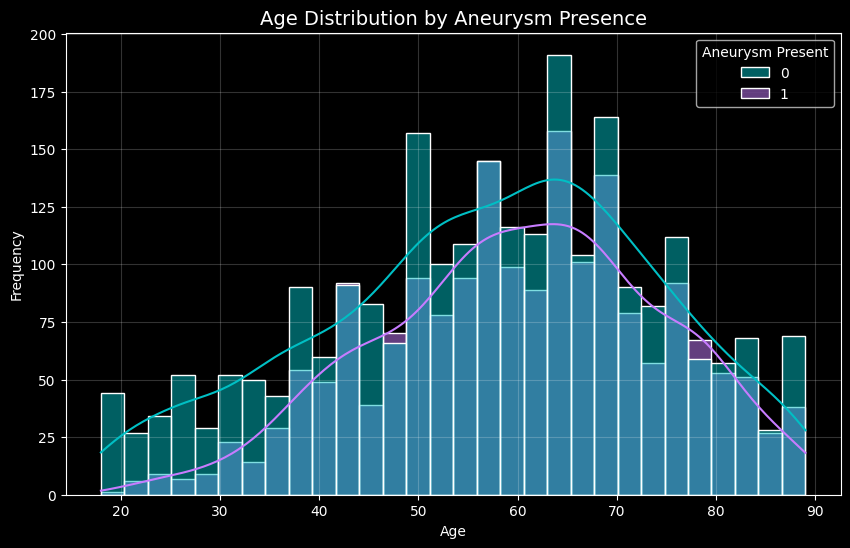

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.figure(figsize=(10,6))
sns.histplot(
    data=train_df,
    x='PatientAge',
    hue='Aneurysm Present',
    bins=30,
    kde=True,
    palette={0: '#00BFC4', 1: '#C77CFF'}
)
plt.title("Age Distribution by Aneurysm Presence", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(alpha=0.2)
plt.show()

In [7]:
pd.crosstab(train_df['PatientSex'], train_df['Aneurysm Present'], normalize='index') * 100

Aneurysm Present,0,1
PatientSex,,
Female,53.211314,46.788686
Male,65.971705,34.028295


In [8]:
fig = px.histogram(
    train_df,
    x='Aneurysm Present',
    title='Class Imbalance: Any Aneurysm Present',
    color='Aneurysm Present',
    text_auto=True,
    color_discrete_map={0: '#00BFC4', 1: '#C77CFF'},
    template='plotly_dark'
)
fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=["No Aneurysm", "Aneurysm"])
fig.show()

In [9]:
# Simple % table (can be styled in notebook output)
gender_ct = pd.crosstab(train_df['PatientSex'], train_df['Aneurysm Present'], normalize='index') * 100
gender_ct = gender_ct.rename(columns={0: 'No Aneurysm (%)', 1: 'Aneurysm (%)'})
gender_ct.style.background_gradient(cmap='crest').format("{:.1f}%")

Aneurysm Present,No Aneurysm (%),Aneurysm (%)
PatientSex,,
Female,53.2%,46.8%
Male,66.0%,34.0%


In [10]:
import pandas as pd
import ast

localizers_df = pd.read_csv('/kaggle/input/rsna-intracranial-aneurysm-detection/train_localizers.csv')

# Convert coordinate strings to dicts
localizers_df['coords'] = localizers_df['coordinates'].apply(ast.literal_eval)
localizers_df['x'] = localizers_df['coords'].apply(lambda d: d['x'])
localizers_df['y'] = localizers_df['coords'].apply(lambda d: d['y'])

localizers_df.drop(columns=['coordinates', 'coords'], inplace=True)
localizers_df.head()

,SeriesInstanceUID,SOPInstanceUID,location,x,y
0,1.2.826.0.1.3680043.8.498.10005158603912009425...,1.2.826.0.1.3680043.8.498.10775329348174902199...,Other Posterior Circulation,258.362119,261.359900
1,1.2.826.0.1.3680043.8.498.10022796280698534221...,1.2.826.0.1.3680043.8.498.53868409774237283281...,Right Middle Cerebral Artery,194.872531,178.326750
2,1.2.826.0.1.3680043.8.498.10023411164590664678...,1.2.826.0.1.3680043.8.498.24186535344744886473...,Right Middle Cerebral Artery,189.239799,209.191849
3,1.2.826.0.1.3680043.8.498.10030095840917973694...,1.2.826.0.1.3680043.8.498.75217084841854214544...,Right Infraclinoid Internal Carotid Artery,208.280505,229.789621
4,1.2.826.0.1.3680043.8.498.10034081836061566510...,1.2.826.0.1.3680043.8.498.71237104731452368587...,Anterior Communicating Artery,249.867456,220.623045


In [11]:
fig = px.density_heatmap(
    localizers_df,
    x='x',
    y='y',
    nbinsx=50,
    nbinsy=50,
    title='Heatmap of Aneurysm Locations in Image Space',
    color_continuous_scale='Turbo',
    template='plotly_dark',
)
fig.update_yaxes(autorange="reversed")
fig.show()

In [12]:
fig = px.scatter(
    localizers_df,
    x='x',
    y='y',
    color='location',
    title='2D Scatter of Aneurysm Coordinates by Location',
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Dark24
)
fig.update_yaxes(autorange="reversed")
fig.show()

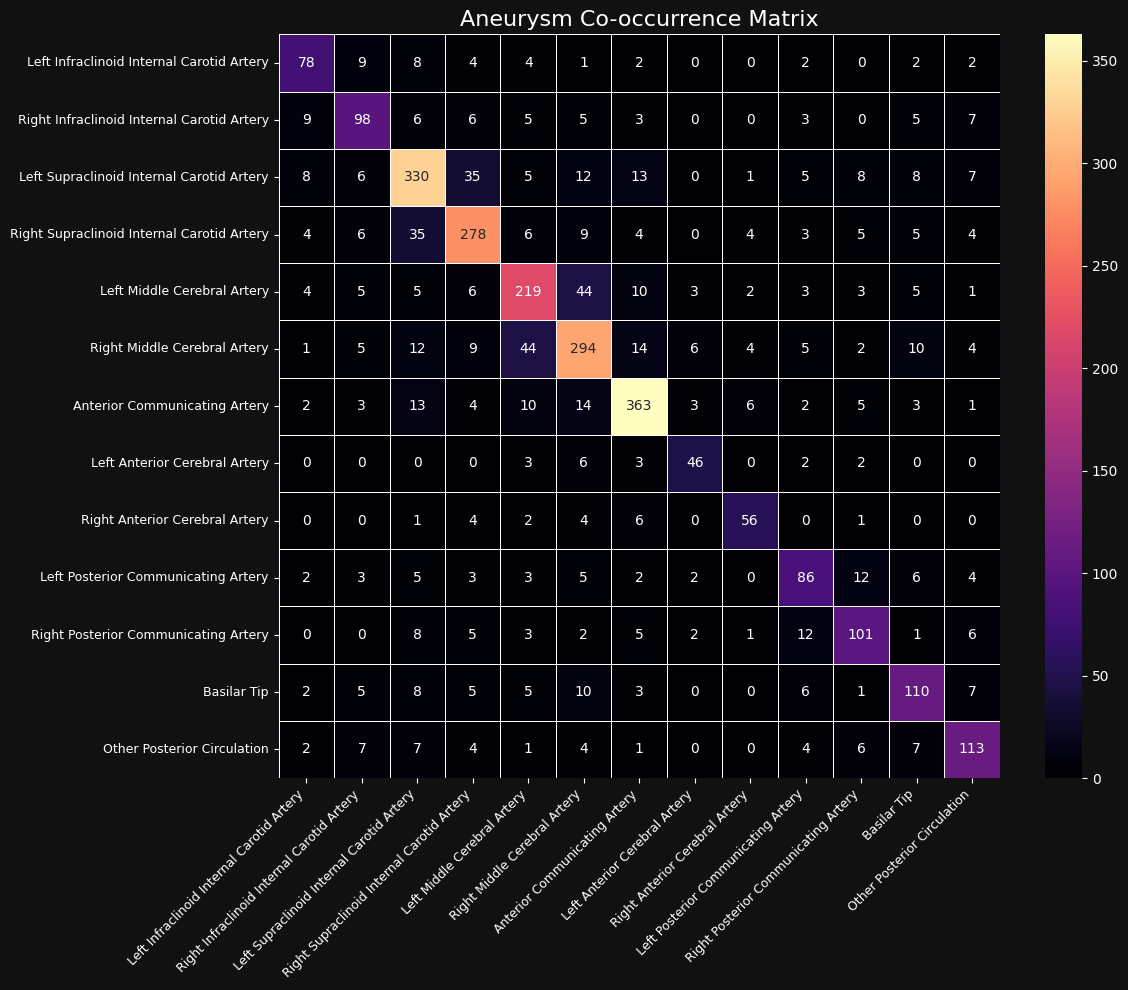

In [13]:
df = train_df
# Identify location columns correctly
location_cols = df.columns[4:-1]  # skip UID, Age, Sex, Modality, and skip final label
location_df = df[location_cols].astype(int)  # just in case they're still object type

# Co-occurrence matrix
co_matrix = location_df.T.dot(location_df)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_matrix, cmap="magma", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Aneurysm Co-occurrence Matrix", fontsize=16, color='white')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('#111111')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



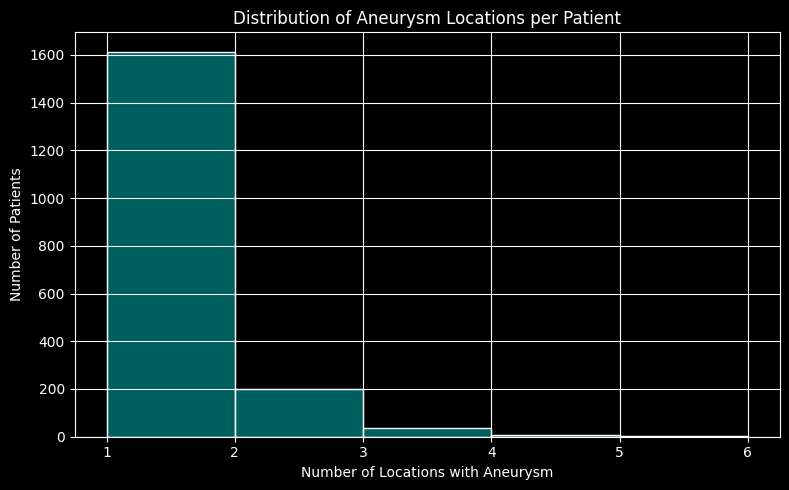

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Location Count Distribution (number of 1s per row)
location_counts = location_df.sum(axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(location_counts, bins=range(1, location_counts.max()+2), kde=False, color="teal")
plt.title("Distribution of Aneurysm Locations per Patient")
plt.xlabel("Number of Locations with Aneurysm")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.tight_layout()
plt.show()

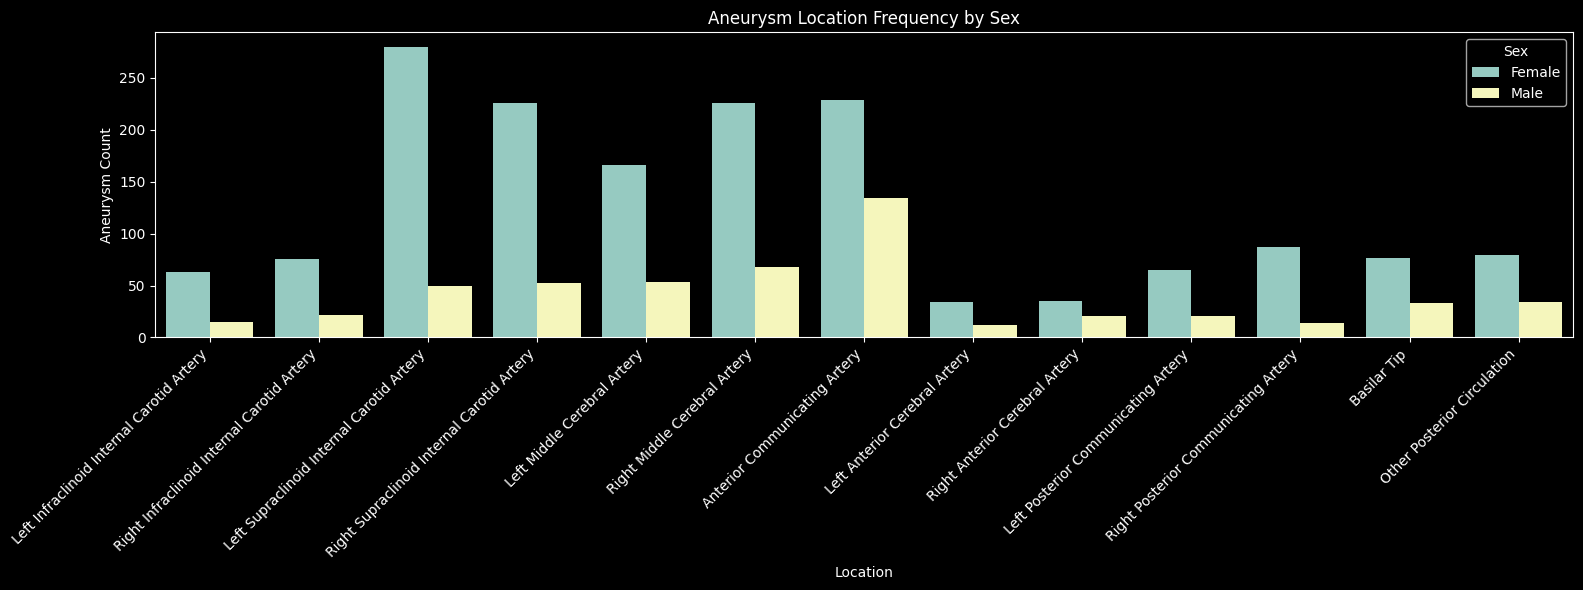

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded and preprocessed (i.e., binary columns are int)

# Filter only rows where aneurysm is present
df_pos = df[df["Aneurysm Present"] == 1]

# List of all aneurysm location columns
location_cols = df_pos.columns[4:-1]  # From 'Left Infraclinoid...' to 'Other Posterior Circulation'

# Group by PatientSex and sum each location
sex_location = df_pos.groupby("PatientSex")[location_cols].sum().T

# Reset index for plotting
sex_location = sex_location.reset_index().melt(id_vars="index", var_name="Sex", value_name="Count")
sex_location = sex_location.rename(columns={"index": "Location"})

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=sex_location, x="Location", y="Count", hue="Sex")
plt.xticks(rotation=45, ha="right")
plt.title("Aneurysm Location Frequency by Sex")
plt.ylabel("Aneurysm Count")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

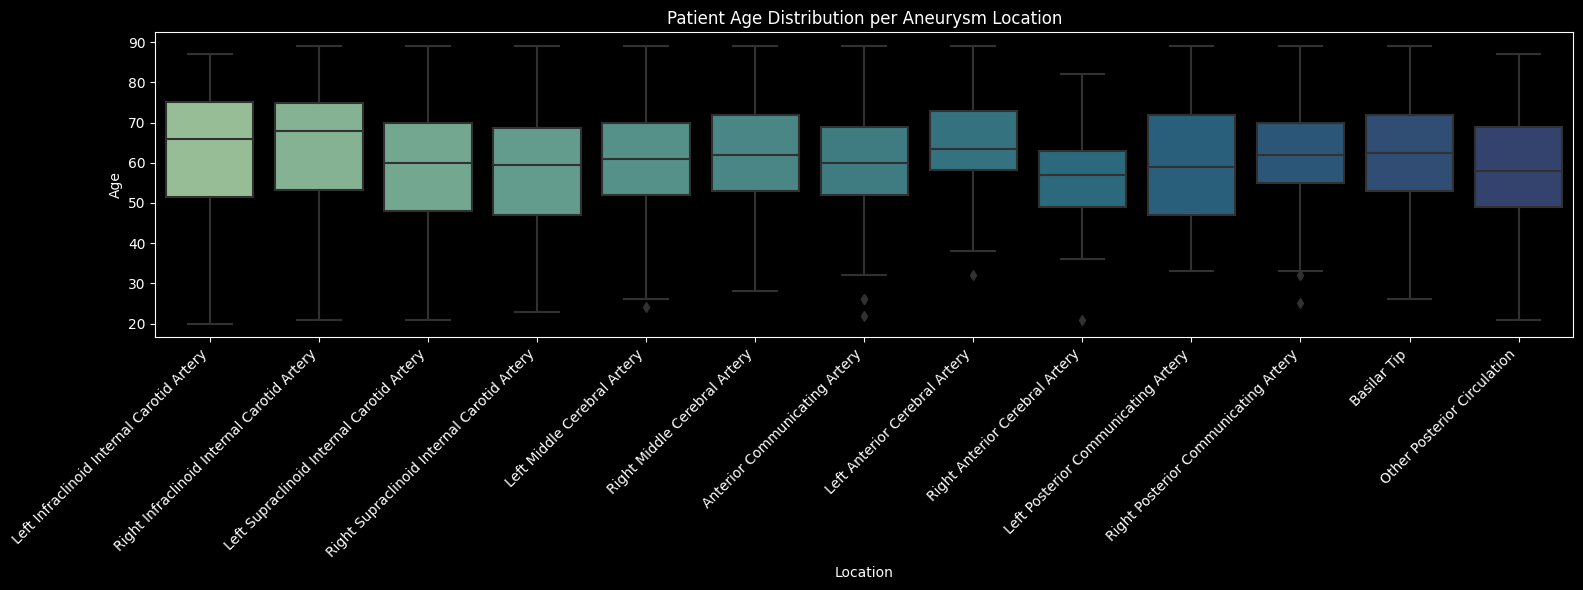

In [16]:
# List of location columns
location_cols = df.columns[4:-1]

# Filter only positive cases
df_pos = df[df["Aneurysm Present"] == 1]

# Prepare a DataFrame: for each location, collect patients with that location = 1
age_location = []

for loc in location_cols:
    subset = df_pos[df_pos[loc] == 1][["PatientAge"]].copy()
    subset["Location"] = loc
    age_location.append(subset)

# Combine all into one DataFrame
age_location_df = pd.concat(age_location)

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(data=age_location_df, x="Location", y="PatientAge", palette="crest")
plt.xticks(rotation=45, ha="right")
plt.title("Patient Age Distribution per Aneurysm Location")
plt.ylabel("Age")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

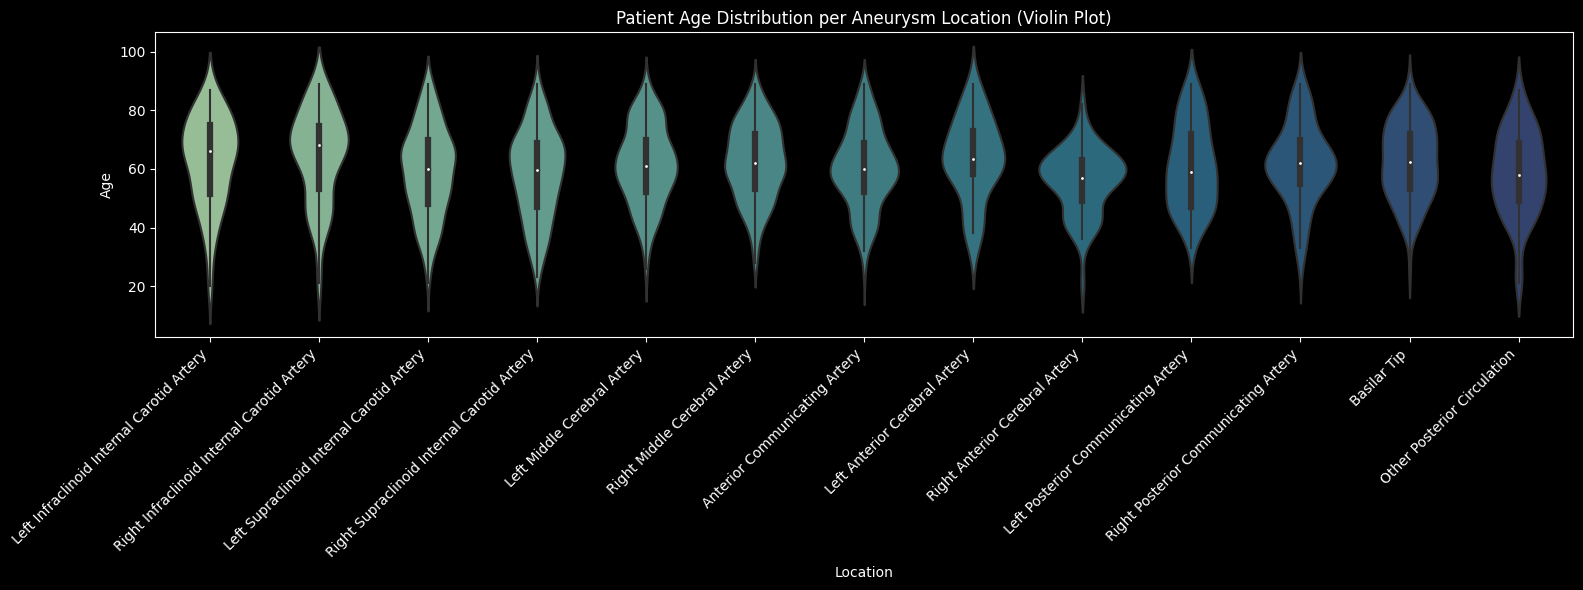

In [17]:
plt.figure(figsize=(16, 6))
sns.violinplot(data=age_location_df, x="Location", y="PatientAge", palette="crest")
plt.xticks(rotation=45, ha="right")
plt.title("Patient Age Distribution per Aneurysm Location (Violin Plot)")
plt.ylabel("Age")
plt.xlabel("Location")
plt.tight_layout()
plt.show()

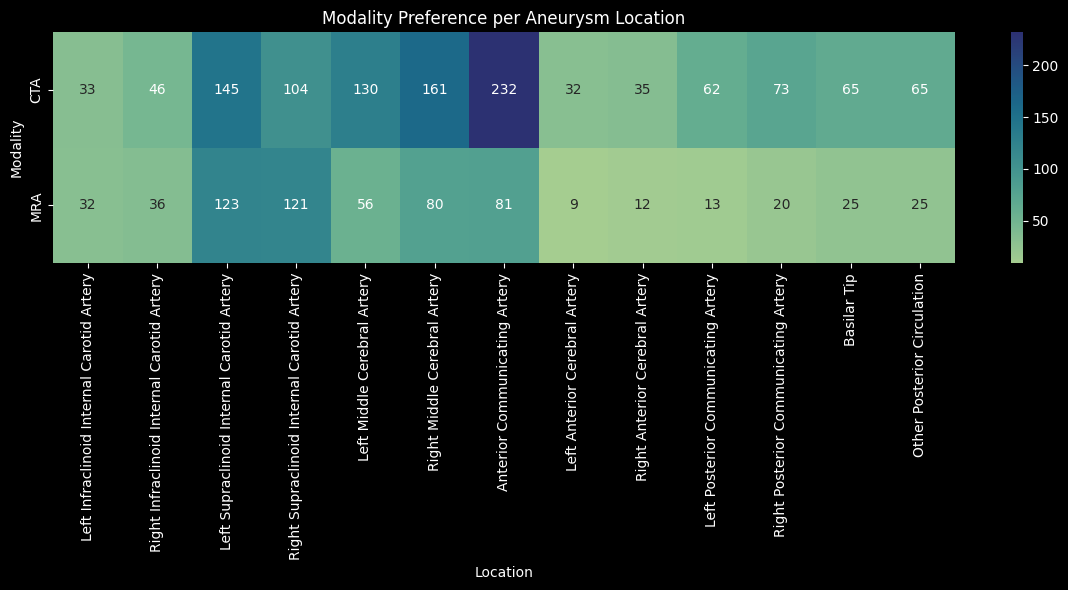

In [18]:
# Filter rows with aneurysm present
df_pos = df[df["Aneurysm Present"] == 1].copy()

# Initialize a dictionary to store counts
modality_counts = {}

for loc in location_cols:
    subset = df_pos[df_pos[loc] == 1]
    modality_distribution = subset["Modality"].value_counts()
    modality_counts[loc] = modality_distribution

# Convert to DataFrame and fill missing values with 0
modality_df = pd.DataFrame(modality_counts).T.fillna(0).astype(int)
modality_df = modality_df[["CTA", "MRA"]] if "CTA" in modality_df.columns and "MRA" in modality_df.columns else modality_df

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(modality_df.T, annot=True, cmap="crest", fmt="d")
plt.title("Modality Preference per Aneurysm Location")
plt.xlabel("Location")
plt.ylabel("Modality")
plt.tight_layout()
plt.show()

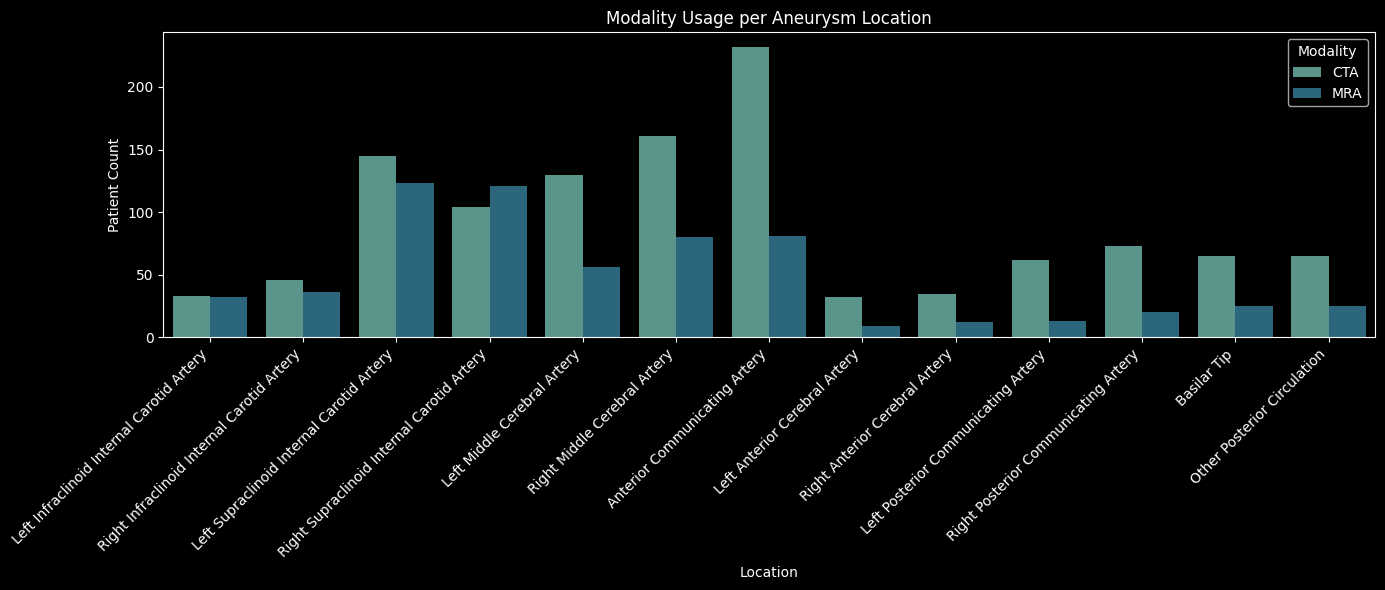

In [19]:
modality_df_melted = modality_df.reset_index().melt(id_vars="index", value_name="Count", var_name="Modality")
modality_df_melted.rename(columns={"index": "Location"}, inplace=True)

plt.figure(figsize=(14, 6))
sns.barplot(data=modality_df_melted, x="Location", y="Count", hue="Modality", palette="crest")
plt.title("Modality Usage per Aneurysm Location")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Location")
plt.ylabel("Patient Count")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



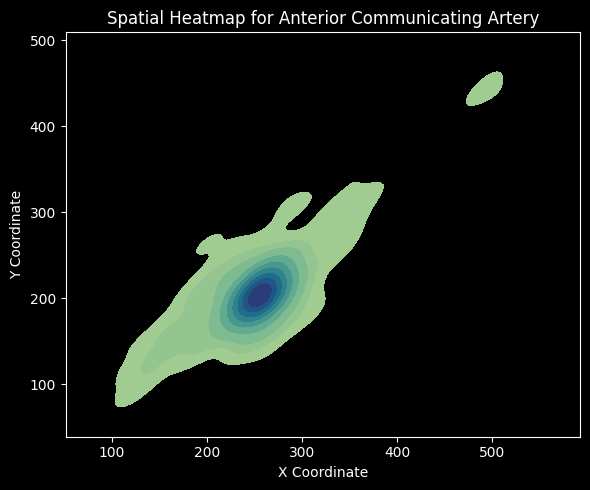

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



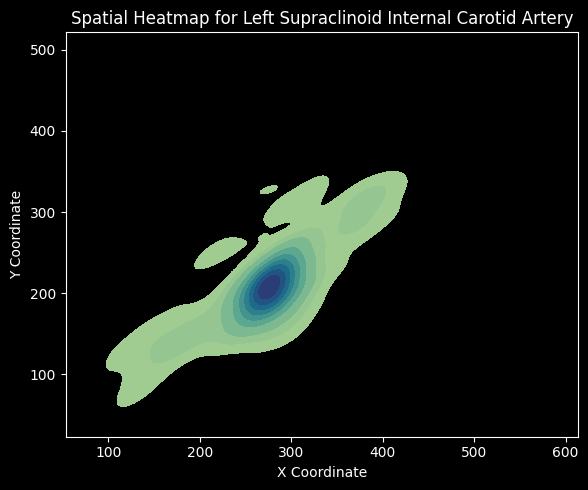

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



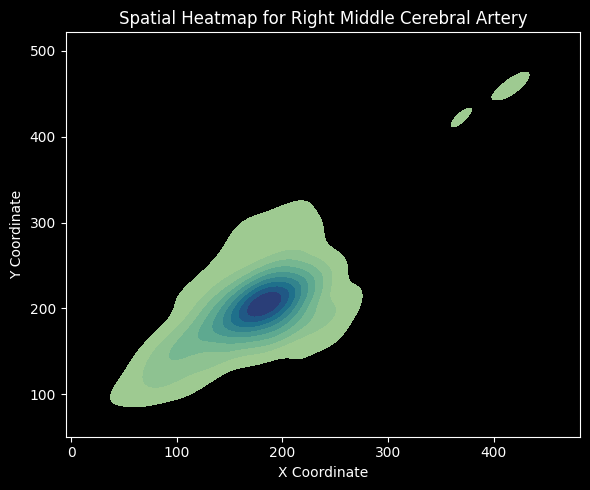

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



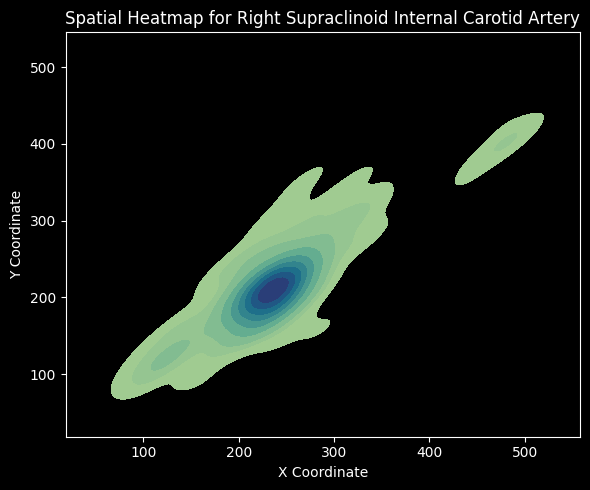

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



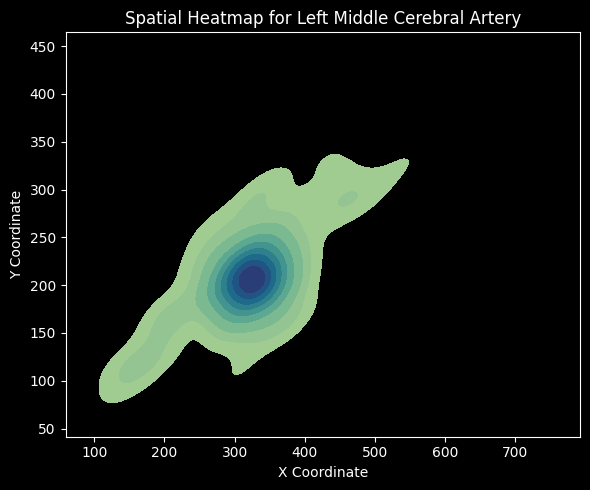

In [20]:
import ast

train_localizations = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train_localizers.csv")
# Parse coordinates
train_localizations["coord_dict"] = train_localizations["coordinates"].apply(ast.literal_eval)
train_localizations["x"] = train_localizations["coord_dict"].apply(lambda d: d["x"])
train_localizations["y"] = train_localizations["coord_dict"].apply(lambda d: d["y"])

# Top 4-5 most frequent locations
top_locations = train_localizations["location"].value_counts().head(5).index

# Plot heatmap per location
for loc in top_locations:
    subset = train_localizations[train_localizations["location"] == loc]
    plt.figure(figsize=(6, 5))
    sns.kdeplot(data=subset, x="x", y="y", fill=True, cmap="crest")
    plt.title(f"Spatial Heatmap for {loc}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.tight_layout()
    plt.show()

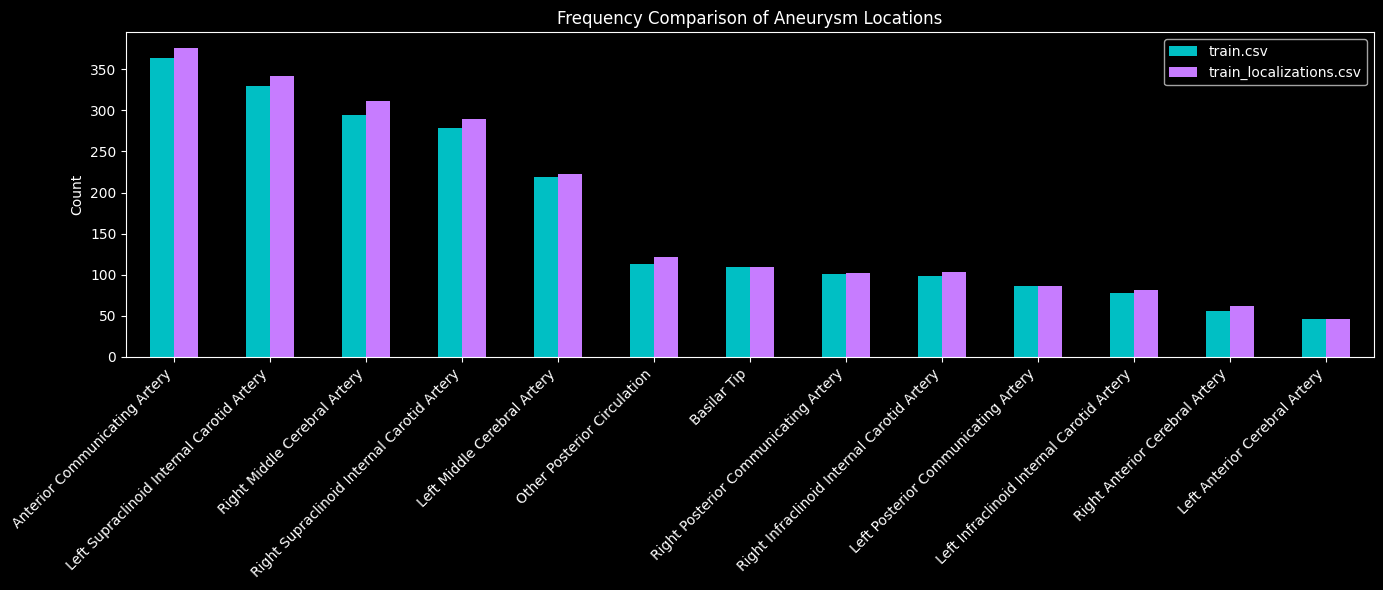

In [21]:
train = pd.read_csv("/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv")
# Frequency from train.csv
label_freq = train[location_cols].sum().sort_values(ascending=False).rename("train.csv")

# Frequency from localizations.csv
localizer_freq = train_localizations["location"].value_counts().rename("train_localizations.csv")

# Combine
freq_comparison = pd.concat([label_freq, localizer_freq], axis=1).fillna(0).astype(int)

# Bar plot
freq_comparison.plot(kind="bar", figsize=(14, 6), color=['#00BFC4',  '#C77CFF'])
plt.title("Frequency Comparison of Aneurysm Locations")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [22]:
import os
import pandas as pd

series_dir = '/kaggle/input/rsna-intracranial-aneurysm-detection/series'
series_folders = [f for f in os.listdir(series_dir) if os.path.isdir(os.path.join(series_dir, f))]

series_counts = []
for folder in series_folders:
    dcm_files = os.listdir(os.path.join(series_dir, folder))
    series_counts.append({'SeriesInstanceUID': folder, 'NumSlices': len(dcm_files)})

df_series = pd.DataFrame(series_counts)
df_series.describe()

,NumSlices
count,4348.000000
mean,230.291168
std,229.518588
min,1.000000
25%,42.000000
50%,176.000000
75%,297.000000
max,1441.000000


In [23]:
import pydicom

sample_path = os.path.join(series_dir, series_folders[0])
sample_file = os.listdir(sample_path)[0]
dcm = pydicom.dcmread(os.path.join(sample_path, sample_file))

print(f"Orientation: {dcm.ImageOrientationPatient}")
print(f"Voxel spacing: {dcm.PixelSpacing}")
print(f"Slice Thickness: {dcm.SliceThickness}")

Orientation: [0.9982057410308, 0.05044316314301, -0.0322612130161, -0.0488204026667, 0.9975925261746, 0.04925159899981]
Voxel spacing: [0.4910714328289, 0.4910714328289]
Slice Thickness: 1.5


In [24]:
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import numpy as np

def load_series(series_path):
    files = sorted(os.listdir(series_path), key=lambda x: pydicom.dcmread(os.path.join(series_path, x)).InstanceNumber)
    images = [pydicom.dcmread(os.path.join(series_path, f)).pixel_array for f in files]
    return np.stack(images)

volume = load_series(os.path.join(series_dir, series_folders[0]))

# Scrollable plot
from ipywidgets import interact
@interact(slice=(0, volume.shape[0]-1))
def show_slice(slice=0):
    plt.imshow(volume[slice], cmap='gray')
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=119), Output()), _dom_classes=('widget-inter…

<Axes: title={'center': '🖼 Common Image Resolutions'}, ylabel='Shape'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 128444 (\N{FRAME WITH PICTURE}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128444 (\N{FRAME WITH PICTURE}) missing from current font.



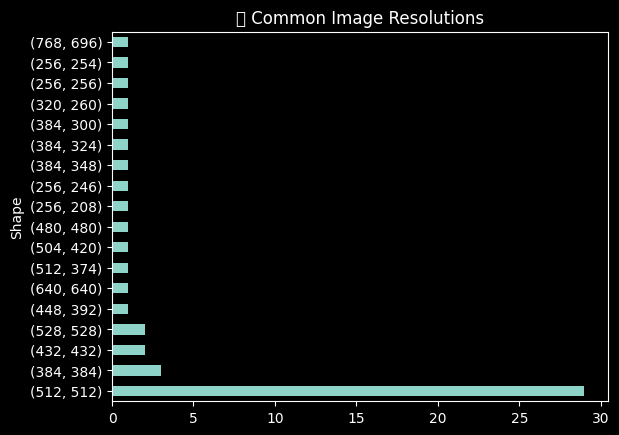

In [25]:
import os
import pydicom

# Count slices and shape per series
dicom_dir = '/kaggle/input/rsna-intracranial-aneurysm-detection/series'
series_stats = []

for series_id in os.listdir(dicom_dir)[:50]:  # limit for speed
    series_path = os.path.join(dicom_dir, series_id)
    files = os.listdir(series_path)
    num_slices = len(files)
    sample_dcm = pydicom.dcmread(os.path.join(series_path, files[0]))
    shape = (sample_dcm.Rows, sample_dcm.Columns)
    series_stats.append({"SeriesInstanceUID": series_id, "Slices": num_slices, "Shape": shape})

pd.DataFrame(series_stats).value_counts("Shape").plot(kind="barh", title="🖼 Common Image Resolutions")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Slice Thickness Distribution')

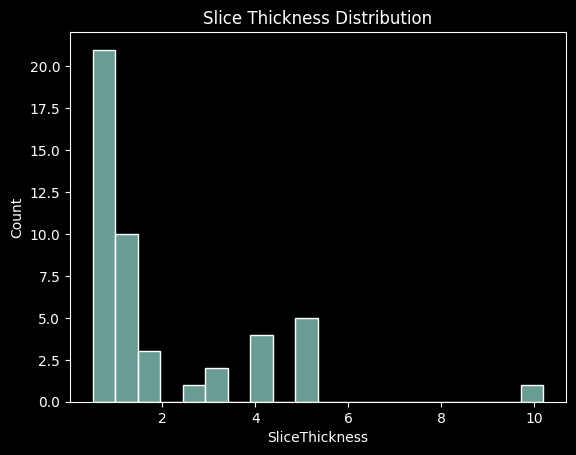

In [26]:
voxel_data = []

for series_id in os.listdir(dicom_dir)[:50]:
    slices = []
    for f in sorted(os.listdir(os.path.join(dicom_dir, series_id))):
        path = os.path.join(dicom_dir, series_id, f)
        dcm = pydicom.dcmread(path)
        slices.append(dcm)

    try:
        spacing = slices[0].PixelSpacing
        thickness = float(slices[0].SliceThickness)
        voxel_data.append({
            "SeriesInstanceUID": series_id,
            "PixelSpacingX": spacing[0],
            "PixelSpacingY": spacing[1],
            "SliceThickness": thickness,
            "NumSlices": len(slices)
        })
    except:
        continue

voxel_df = pd.DataFrame(voxel_data)
sns.histplot(voxel_df["SliceThickness"], bins=20)
plt.title("Slice Thickness Distribution")

In [27]:
seg_dir = "/kaggle/input/rsna-intracranial-aneurysm-detection/segmentations"
seg_series = [f.replace(".nii.gz", "") for f in os.listdir(seg_dir)]
print("Segmented Series:", len(seg_series))

# % of series with segmentation
seg_percent = len(seg_series) / len(os.listdir(dicom_dir)) * 100
print(f"{seg_percent:.2f}% of series have vessel segmentation.")

Segmented Series: 356
8.19% of series have vessel segmentation.
